# GRIP : The Sparks Foundation

## Data Science and Business Analytics Intern

### By : Bharati Khaire

### Task 1: Prediction Using Supervised ML

#### In this task we predict the percentage of student based on number of study hours.

#### Dataset : "http://bit.ly/w-data"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
#URL : "http://bit.ly/w-data"
data = pd.read_csv("C:\\Users\\Admin\\OneDrive\\Documents\\Student_data.csv")
print("Data Imported Successfully")

Data Imported Successfully


In [6]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data.shape

(25, 2)

In [17]:
# Checking the null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Data visualization

### Here we understand the relationship between the two variables


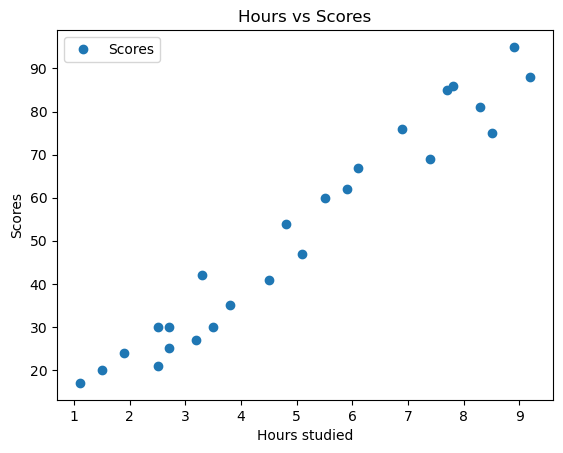

In [9]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Scores')
plt.show()

#### From the above graph, we can observe that the Scores increases with number of hours.There is a positive linear relationship between two variables.


In [10]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Splitting the data

In [11]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [12]:
# Train Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 50)


In [13]:
x_train.shape, x_test.shape

((20, 1), (5, 1))

#### We have devided 80% of data to training and 20%of data to test data


## Training The Model

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

Text(0, 0.5, 'Scores')

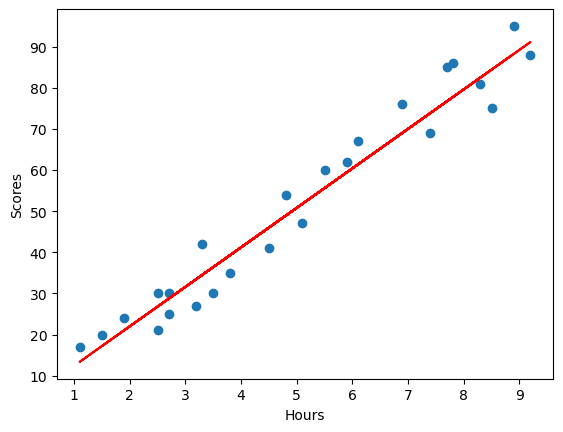

In [16]:
# Plotting the regession line
line = lr.coef_*x+lr.intercept_
plt.scatter(x, y)
plt.plot(x, line, color = 'r')
plt.xlabel('Hours')
plt.ylabel('Scores')

## Make Predictions

In [22]:
print(x_test)
y_pred = lr.predict(x_test)

[[8.9]
 [2.7]
 [6.9]
 [3.8]
 [1.1]]


In [19]:
y_pred

array([88.21139357, 28.71845267, 69.02012231, 39.27365186, 13.36543566])

In [23]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


In [26]:
h = np.array([[9.25]])
print("Hours : 9.25")
print("Predicted score:",lr.predict(h)[0])

Hours : 9.25
Predicted score: 91.56986604454477


## Model Evaluation

In [27]:
#checking the Efficiancy of model
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test,y_pred))
print("R2 Score: ", metrics.r2_score(y_test,y_pred))


Mean Absolute Error:  4.5916495300630285
Mean Squared Error:  25.58407829653998
R2 Score:  0.971014141329942


#### Here mean absolute error indicates that the error through this model is very less.R2 score is 0.97(nearly 1) which indicates that the model fits perfectly to the dataset.